In [29]:
import pandas as pd

col_types = {
    'institution': str,
    'manufacturer': str,
    'model': str,
    'modality': str,
    'year': str,
    'tag': str,
    'value': str,
    'subject': str,
    'session': str,
    'series': str,
    'image': str
}

# Insert your source file 
# df = pd.read_csv('<your_file_directory>', dtype=col_types)
# summary_df = df.groupby(['institution', 'manufacturer', 'model', 'modality', 'year', 'tag', 'value']).nunique().reset_index()
# summary_df.iloc[:-1].to_csv('./files/jhh_dicom_oct_cs_summary.csv', index=False)

In [2]:
cd ..

/Users/wooyeonpark/Documents/GitHub/DICOM2OMOP


In [3]:
import pandas as pd

df = pd.read_csv('./files/jhh_dicom_cs_oct_summary.csv')
attributes = pd.read_csv('./files/part6_CS_attributes.csv')

In [5]:
df.subject.max()

1245

In [4]:
attributes['Tag_clean'] = attributes['Tag'].str.replace('[(),]', '', regex=True)
df_tags = pd.merge(df, attributes[['Tag_clean', 'Name']], how='left', left_on='tag', right_on='Tag_clean')
df_tags

,institution,manufacturer,model,modality,year,tag,value,subject,session,series,image,Tag_clean,Name
0,CZMI,Carl Zeiss Meditec,CIRRUS HD-OCT 4000,OPT,2008,00080005,ISO_IR 192,33,37,87,11136,00080005,Specific Character Set
1,CZMI,Carl Zeiss Meditec,CIRRUS HD-OCT 4000,OPT,2008,00080008,MAC CUBE 512X128,33,37,87,11136,00080008,Image Type
2,CZMI,Carl Zeiss Meditec,CIRRUS HD-OCT 4000,OPT,2008,00080008,ORIGINAL,33,37,87,11136,00080008,Image Type
3,CZMI,Carl Zeiss Meditec,CIRRUS HD-OCT 4000,OPT,2008,00080008,PRIMARY,33,37,87,11136,00080008,Image Type
4,CZMI,Carl Zeiss Meditec,CIRRUS HD-OCT 4000,OPT,2008,00080060,OPT,33,37,87,11136,00080060,Modality
...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,Wilmer Glaucoma Center of Excellence,Carl Zeiss Meditec,CIRRUS HD-OCT 4000,OPT,2018,00280004,MONOCHROME2,1,1,2,256,00280004,Photometric Interpretation
633,Wilmer Glaucoma Center of Excellence,Carl Zeiss Meditec,CIRRUS HD-OCT 4000,OPT,2018,00280301,NO,1,1,2,256,00280301,Burned In Annotation
634,Wilmer Glaucoma Center of Excellence,Carl Zeiss Meditec,CIRRUS HD-OCT 4000,OPT,2018,00282110,01,1,1,2,256,00282110,Lossy Image Compression
635,Wilmer Glaucoma Center of Excellence,Carl Zeiss Meditec,CIRRUS HD-OCT 4000,OPT,2018,00282114,ISO_15444_1,1,1,2,256,00282114,Lossy Image Compression Method


In [37]:
tag_aggregated = df_tags.groupby(['Name', 'tag']).agg({'value': 'nunique'}).reset_index()
tag_aggregated = tag_aggregated.rename(columns={'value':'unique_value_count'})
tag_aggregated

,Name,tag,unique_value_count
0,Acquisition Time Synchronized,00181800,1
1,Burned In Annotation,00280301,1
2,Detector Type,00187004,1
3,Frame Laterality,00209072,2
4,Image Laterality,00200062,2
5,Image Type,00080008,4
6,Laterality,00200060,2
7,Lossy Image Compression,00282110,1
8,Lossy Image Compression Method,00282114,1
9,Modality,00080060,1


In [38]:
# Filter df_tags where tag appears in tag_aggregated with unique_value_count > 1
filtered_df_tags = df_tags[df_tags['tag'].isin(tag_aggregated[tag_aggregated['unique_value_count'] > 1]['tag'])]
filtered_df_tags

,institution,manufacturer,model,modality,year,tag,value,subject,session,series,image,Tag_clean,Name
1,CZMI,Carl Zeiss Meditec,CIRRUS HD-OCT 4000,OPT,2008,00080008,MAC CUBE 512X128,33,37,87,11136,00080008,Image Type
2,CZMI,Carl Zeiss Meditec,CIRRUS HD-OCT 4000,OPT,2008,00080008,ORIGINAL,33,37,87,11136,00080008,Image Type
3,CZMI,Carl Zeiss Meditec,CIRRUS HD-OCT 4000,OPT,2008,00080008,PRIMARY,33,37,87,11136,00080008,Image Type
5,CZMI,Carl Zeiss Meditec,CIRRUS HD-OCT 4000,OPT,2008,00100040,F,18,19,39,4992,00100040,Patient's Sex
6,CZMI,Carl Zeiss Meditec,CIRRUS HD-OCT 4000,OPT,2008,00100040,M,12,14,40,5120,00100040,Patient's Sex
...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,Wilmer Glaucoma Center of Excellence,Carl Zeiss Meditec,CIRRUS HD-OCT 4000,OPT,2018,00200060,R,1,1,1,128,00200060,Laterality
627,Wilmer Glaucoma Center of Excellence,Carl Zeiss Meditec,CIRRUS HD-OCT 4000,OPT,2018,00200062,L,1,1,1,128,00200062,Image Laterality
628,Wilmer Glaucoma Center of Excellence,Carl Zeiss Meditec,CIRRUS HD-OCT 4000,OPT,2018,00200062,R,1,1,1,128,00200062,Image Laterality
629,Wilmer Glaucoma Center of Excellence,Carl Zeiss Meditec,CIRRUS HD-OCT 4000,OPT,2018,00209072,L,1,1,1,128,00209072,Frame Laterality


/Users/wooyeonpark/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


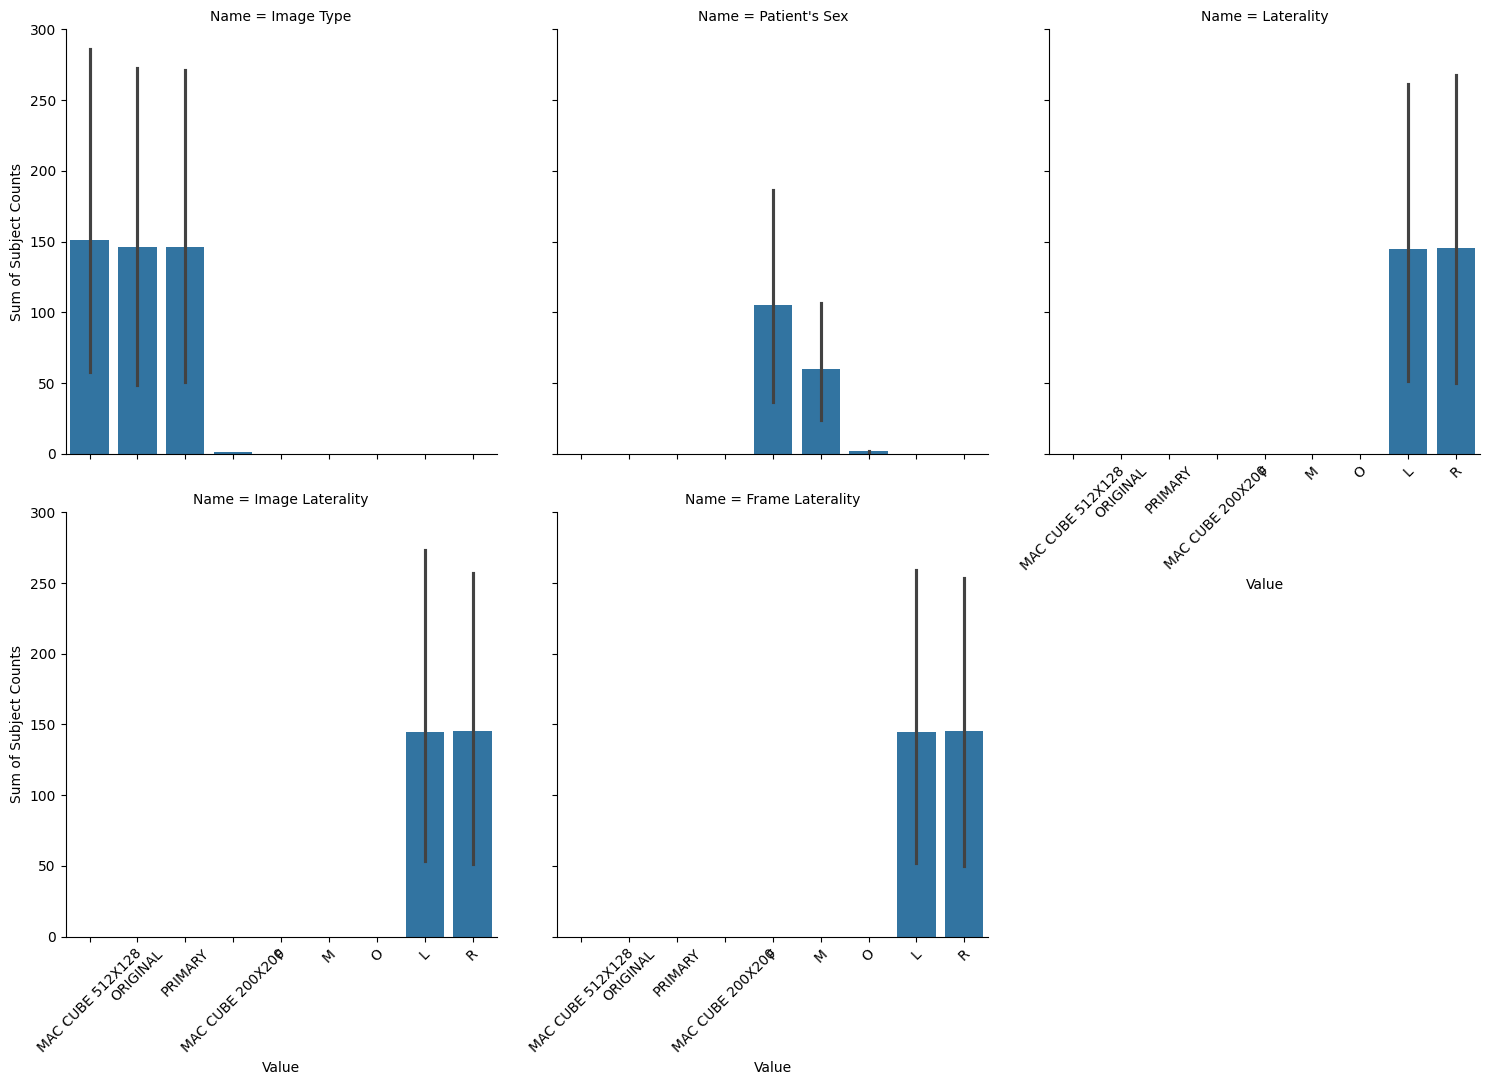

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid with seaborn and adjust size
g = sns.FacetGrid(filtered_df_tags, col="Name", col_wrap=3, height=5)

# Map a bar plot to each tag
g.map(sns.barplot, "value", "subject")

# Adjust plot labels and titles
g.set_axis_labels("Value", "Sum of Subject Counts")

# Rotate x-axis labels for better readability
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.show()
